In [12]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
dft = pd.read_csv('trackdata.csv')
dft.head()

,name,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,RAP DEVIL,286117,68,0.2170,0.895,0.839,0.000003,0.239,-4.512,0.2270,149.951,4
1,Another Day in Paradise - 2016 Remaster,322133,78,0.7360,0.780,0.565,0.002690,0.063,-7.320,0.0306,101.967,4
2,Jamming,211000,77,0.1020,0.934,0.467,0.000040,0.109,-10.990,0.3070,123.583,4
3,Mo Money Mo Problems (feat. Puff Daddy & Mase)...,257399,79,0.0128,0.845,0.884,0.000002,0.203,-4.506,0.0759,104.536,4
4,Drive - 2017 Remaster,234332,72,0.1150,0.261,0.703,0.000780,0.102,-7.871,0.0414,83.495,4


In [4]:
print(dft.dtypes)

name                 object
length                int64
popularity            int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
dtype: object


In [5]:
df = dft.drop(columns=['name'])
print(df.columns)

Index(['length', 'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')


In [7]:
attributes = df.columns
stats = round(df[attributes].describe(), 3)
stats.head()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,4416.000,4416.000,4416.000,4416.000,4416.000,4416.000,4416.000,4416.000,4416.000,4416.000,4416.000
mean,220842.441,65.366,0.196,0.647,0.662,0.019,0.179,-6.483,0.101,120.877,3.973
std,51567.329,23.755,0.231,0.147,0.177,0.100,0.135,2.724,0.098,28.369,0.263
min,86826.000,0.000,0.000,0.104,0.026,0.000,0.021,-30.016,0.023,43.509,1.000
25%,190056.000,66.000,0.024,0.551,0.547,0.000,0.093,-7.670,0.038,99.000,4.000


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda/envs/azureml_py3

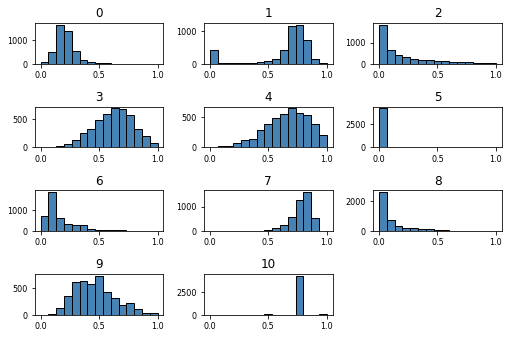

In [15]:
x = df.values
scaled = MinMaxScaler().fit_transform(x)
df = pd.DataFrame(scaled)
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

In [54]:
db = DBSCAN(eps=0.3, min_samples=20).fit(df)
labels = db.labels_
print(set(labels))
df['labels'] = labels

{0, 1, 2, 3, 4, -1}


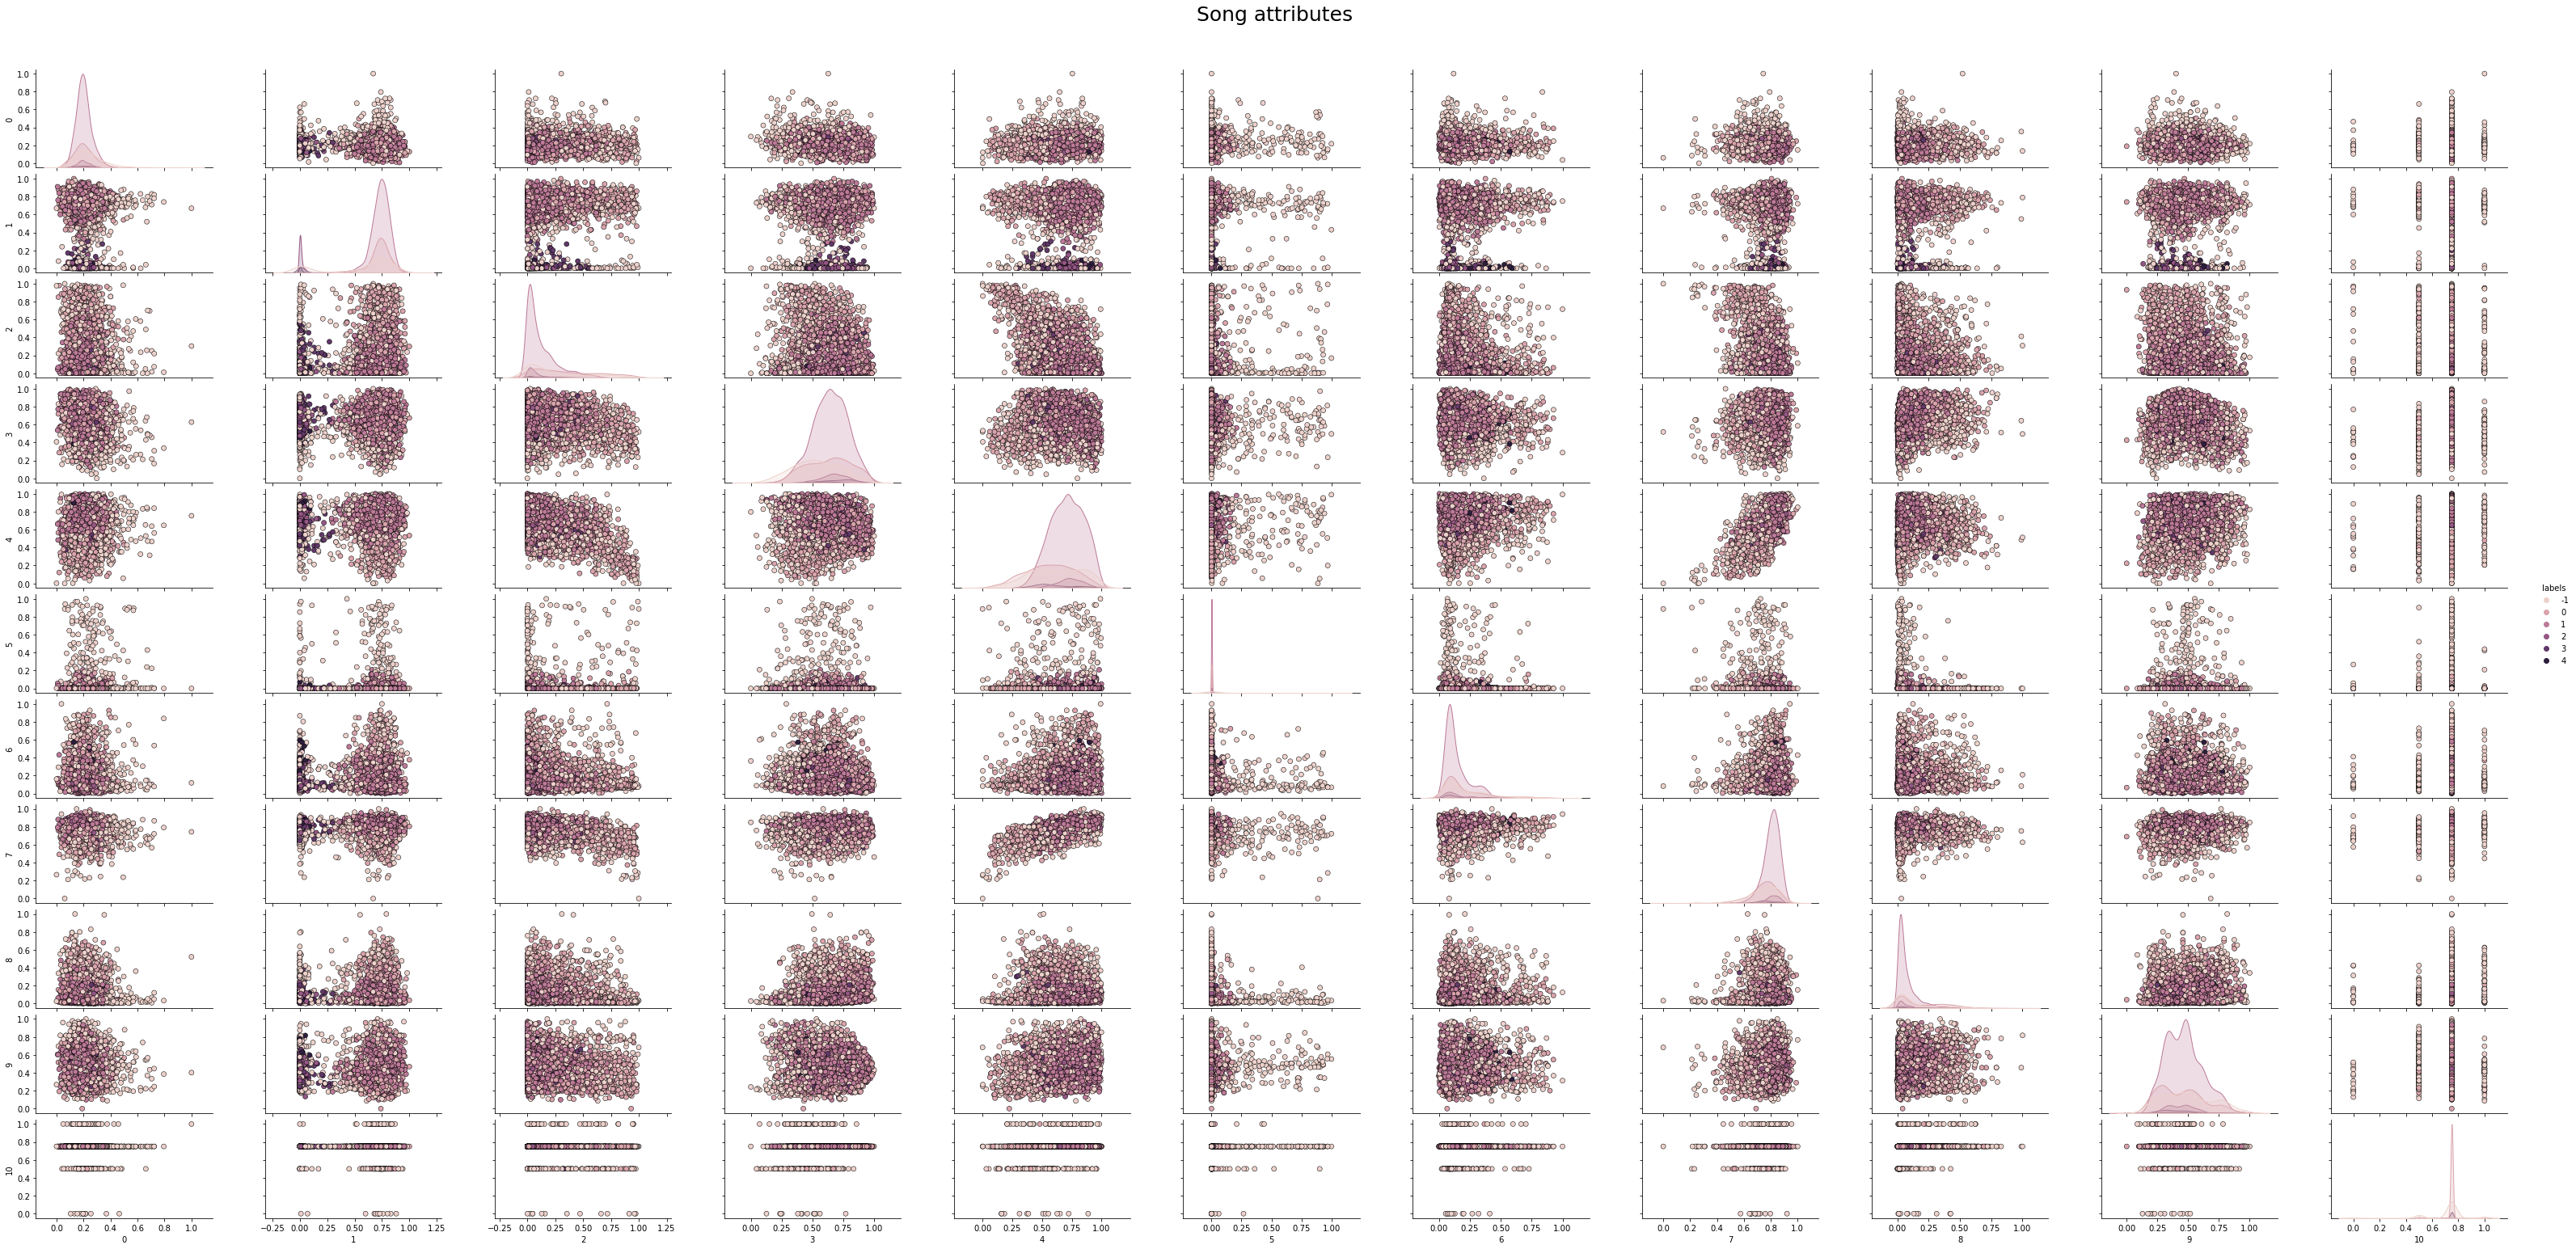

In [56]:
column = df.columns
pp = sns.pairplot(df[column], hue="labels", height=2,aspect=2,plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Song attributes', fontsize=25)